In [205]:
import pandas as pd #read csv
import numpy as np 
import matplotlib.pyplot as plt #just plot
import seaborn as sns
import keras
from sklearn.model_selection import train_test_split

In [206]:
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Dense, Activation, Input, Embedding, Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical, pad_sequences
from keras.callbacks import EarlyStopping

In [207]:
df=pd.read_csv('spam.csv')
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:>

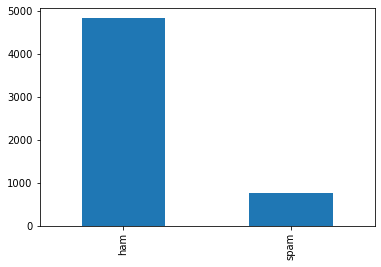

In [208]:
df.Category.value_counts().plot.bar()

In [210]:
X=df.Message
Y=df.Category
le=LabelEncoder() #call LabelEncoder and name it le
Y=le.fit_transform(Y)
print(X)
print(Y)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object
[0 0 1 ... 0 0 0]


In [211]:
Y=Y.reshape(-1,1)
print(Y)

[[0]
 [0]
 [1]
 ...
 [0]
 [0]
 [0]]


In [212]:
trainx, testx, trainy, testy= train_test_split(X, Y, test_size=0.15)
#trainx-traning data for message 
#trainy-training data for category
print(trainx)
print(len(trainx))

510     Your opinion about me? 1. Over 2. Jada 3. Kusr...
3620    8007 25p 4 Alfie Moon's Children in Need song ...
371     Hello my boytoy ... Geeee I miss you already a...
3726                   Nothing spl..wat abt u and whr ru?
1057                                    Then u drive lor.
                              ...                        
625     Nah it's straight, if you can just bring bud o...
5403             So gd got free ice cream... I oso wan...
3901                                                 Okie
1891    Ok but knackered. Just came home and went to s...
1689                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4736, dtype: object
4736


In [213]:
max_words=1000
max_len=150 #our preferred size of vector/word
tk=Tokenizer(num_words=max_words) #called tokenizer and named it tk
tk.fit_on_texts(trainx) #trainx cuz its the message that needs to be broken down into words so it can be embedded
words=tk.texts_to_sequences(trainx)
print(words)
print(len(words))
#to make all vectors of same size -padding

[[13, 86, 10, 130, 196, 19, 162, 40, 213, 279, 289, 25, 503, 433, 795, 115, 97], [504, 40, 9, 75, 906, 18, 29, 480, 104, 29, 72, 227, 983, 2, 504, 12, 26, 601, 983, 12, 19, 983], [246, 11, 748, 1, 183, 3, 152, 7, 1, 35, 907, 42, 1, 228, 3, 236, 121, 9, 481, 37, 10, 10, 1, 66, 3], [350, 138, 569, 6, 7], [55, 6, 602, 81], [21, 840, 398, 153, 20, 60, 1, 27, 59], [1, 908, 3, 77, 4, 7, 909, 3, 77, 11, 271, 77, 324, 77, 5, 325, 90, 520, 326, 841, 603, 34, 251, 202], [55, 242, 81], [60, 30, 44, 43, 2, 19], [25, 4, 327, 119, 702, 121, 910, 174, 8, 30, 106, 7, 8, 415, 749, 35, 10, 7, 9, 30, 5, 49, 17, 3, 108], [76, 58, 4, 220, 338, 521, 18, 5, 139], [604, 339, 103, 544, 58], [18, 116, 6, 78, 81], [505, 434, 252, 23, 381, 237, 34, 121, 570, 340], [], [23, 20, 506, 3, 89, 109, 15], [67, 22, 4, 55], [189, 39, 17, 4, 842, 843, 172, 184, 126, 133, 238, 23, 197, 126, 18, 29, 94, 26, 750, 143, 189, 256, 192], [76, 328, 1, 32, 16, 3, 155], [1, 61, 984, 33, 14, 190, 34, 435, 12, 3, 2, 16, 985, 7, 193, 1

In [214]:
pwords=keras.utils.pad_sequences(words, maxlen=max_len)
print(pwords) 

[[  0   0   0 ... 795 115  97]
 [  0   0   0 ...  12  19 983]
 [  0   0   0 ...   1  66   3]
 ...
 [  0   0   0 ...   0   0 646]
 [  0   0   0 ... 581  64 135]
 [  0   0   0 ...   0   0 157]]


In [215]:
#creating model using functional API
inputs=Input(shape=[max_len]) #input layer
layer=Embedding(max_words, 50, input_length=max_len)(inputs)#Embedding Layer
layer=LSTM(64)(layer)
layer=Dense(256)(layer)
layer=Activation('relu')(layer)
layer=Dropout(0.5)(layer)
layer=Dense(1)(layer)
layer=Activation('sigmoid')(layer)
model=Model(inputs=inputs, outputs=layer)

In [216]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 150)]             0         
                                                                 
 embedding_11 (Embedding)    (None, 150, 50)           50000     
                                                                 
 lstm_11 (LSTM)              (None, 64)                29440     
                                                                 
 dense_12 (Dense)            (None, 256)               16640     
                                                                 
 activation_12 (Activation)  (None, 256)               0         
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 1)                 257

In [217]:
model.compile(loss='binary_crossentropy', optimizer=RMSprop(), metrics=['accuracy'])

In [218]:
#fitting our training data on the model created
model.fit(pwords, trainy, batch_size=128, epochs=10)

Epoch 1/10
37/37 [==============================] - 4s 77ms/step - loss: 0.2668 - accuracy: 0.9092
Epoch 2/10
37/37 [==============================] - 3s 76ms/step - loss: 0.0614 - accuracy: 0.9850
Epoch 3/10
37/37 [==============================] - 3s 75ms/step - loss: 0.0409 - accuracy: 0.9899
Epoch 4/10
37/37 [==============================] - 3s 75ms/step - loss: 0.0298 - accuracy: 0.9922
Epoch 5/10
37/37 [==============================] - 3s 75ms/step - loss: 0.0254 - accuracy: 0.9928
Epoch 6/10
37/37 [==============================] - 3s 78ms/step - loss: 0.0183 - accuracy: 0.9954
Epoch 7/10
37/37 [==============================] - 3s 81ms/step - loss: 0.0137 - accuracy: 0.9966
Epoch 8/10
37/37 [==============================] - 3s 76ms/step - loss: 0.0113 - accuracy: 0.9968
Epoch 9/10
37/37 [==============================] - 3s 76ms/step - loss: 0.0087 - accuracy: 0.9977
Epoch 10/10
37/37 [==============================] - 3s 76ms/step - loss: 0.0089 - accuracy: 0.9973


In [219]:
test1=["Please send your bank account details to 8235860944. There is an urgent message waiting for you"]
test=tk.texts_to_sequences(test1)
test=keras.utils.pad_sequences(test, maxlen=max_len)

In [220]:
ans=model.predict(test)
print(ans)
if(ans<0.5):
    print("HAM") #from above we know 0 is ham and 1 is spam
else:
    print("SPAM")

1/1 [==============================] - 0s 235ms/step
[[0.9993217]]
SPAM
